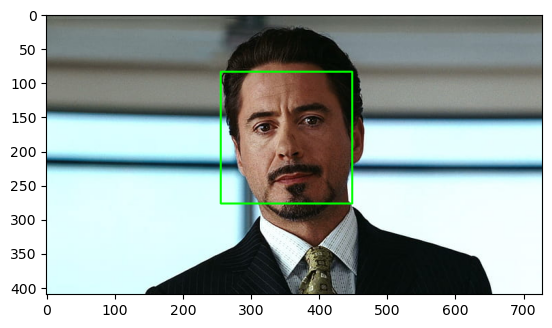

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def detect_faces(cascade, frame, scaleFactor=1.1):
    image_copy = frame.copy()
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return image_copy

haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

tetimg=cv2.imread('11.jpg')
frame = detect_faces(haar_cascade_face, tetimg)
plt.imshow(convertToRGB(frame))


In [ ]:
video_path = '33.mp4'
video_capture = cv2.VideoCapture(video_path)
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    frame_with_faces = detect_faces(haar_cascade_face, frame)
    cv2.imshow('Video', frame_with_faces)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()